In [1]:
import numpy as np
import tensorflow as tf
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

2024-04-21 22:06:13.351473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def im2col(input_image, kernel_shape, stride=1):
    # Dimensions
    input_height, input_width = input_image.shape
    kernel_height, kernel_width = kernel_shape
    output_height = (input_height - kernel_height) // stride + 1
    output_width = (input_width - kernel_width) // stride + 1
    
    # column matrix
    col = np.zeros((kernel_height * kernel_width, output_height * output_width))
    for i in range(kernel_height):
        for j in range(kernel_width):
            row = i * kernel_width + j
            for y in range(output_height):
                for x in range(output_width):
                    col[row, y * output_width + x] = input_image[y * stride + i, x * stride + j]
    return col

In [3]:
def im2col_convolution(image, kernel):
    # im2col matrix
    cols = im2col(image, kernel.shape)
    # Flatten perform matrix multiplication on kernel
    kernel_flat = kernel.flatten()
    output = kernel_flat @ cols
    return output.reshape((image.shape[0] - kernel.shape[0] + 1, image.shape[1] - kernel.shape[1] + 1))


In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

In [5]:
time_records = []
memory_records = []

# Process only the first 20 images
for image in train_images[:50]:
    start_time = time.time()  
    mem_usage = memory_usage((im2col_convolution, (image, kernel)), interval=0.1, timeout=1)
    time_taken = time.time() - start_time  # Time taken 

    time_records.append(time_taken)
    memory_records.append(max(mem_usage) - min(mem_usage))  # Max memory used 

# Compute average time and memory usage
average_time = np.mean(time_records)
average_memory = np.mean(memory_records)

print(f"Average Time: {average_time:.5f} seconds")
print(f"Average Memory: {average_memory:.5f} MB")

Average Time: 1.64817 seconds
Average Memory: 0.00031 MB


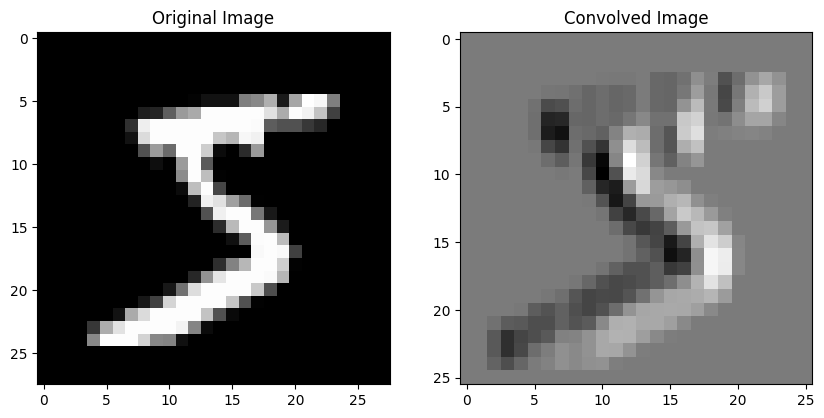

In [6]:
output_image = im2col_convolution(train_images[0], kernel)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(train_images[0], cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Convolved Image')
plt.show()